In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pylidc as pl
from  tqdm.notebook import tqdm
import tensorflow as tf
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import pylidc as pl
%matplotlib inline

# Histogram Mal vs Ben

In [2]:
mal_anns = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 5)

ben_anns = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 1)

In [5]:
mal_diameter = []
for ann in tqdm(mal_anns):
    mal_diameter.append(ann.diameter)
    
ben_diameter = []
for ann in tqdm(ben_anns):
    ben_diameter.append(ann.diameter)

0it [00:00, ?it/s]

In [23]:
mal_volume = []
for ann in tqdm(mal_anns):
    mal_volume.append(ann.volume)
                
ben_volume = []
for ann in tqdm(ben_anns):
    ben_volume.append(ann.volume)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

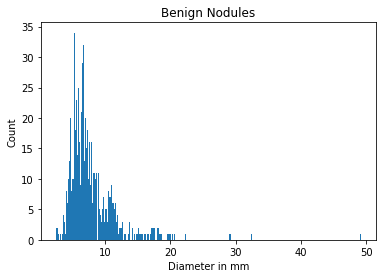

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(ben_diameter, density=False, bins=500)  # density=False would make counts
plt.title('Benign Nodules')
plt.ylabel('Count')
plt.xlabel('Diameter in mm');
plt.savefig('./figs/histogram-benign.jpg')

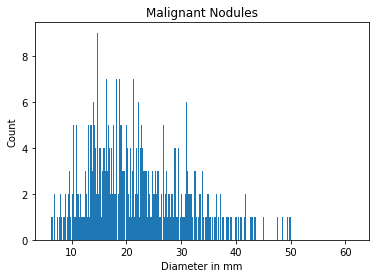

In [18]:
plt.hist(mal_diameter, density=False, bins=500)  # density=False would make counts
plt.title('Malignant Nodules')
plt.ylabel('Count')
plt.xlabel('Diameter in mm');
plt.savefig('./figs/histogram-malignant.jpg')

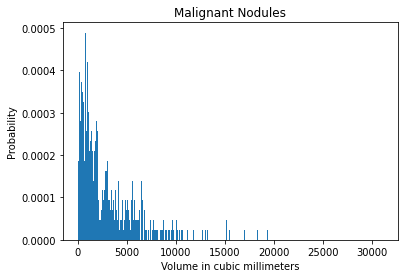

In [36]:
plt.hist(mal_volume, density=True, bins=500)  # density=False would make counts
plt.title('Malignant Nodules')
plt.ylabel('Probability')
plt.xlabel('Volume in cubic millimeters');
plt.savefig('./figs/histogram-malignant-volume-prob.jpg')

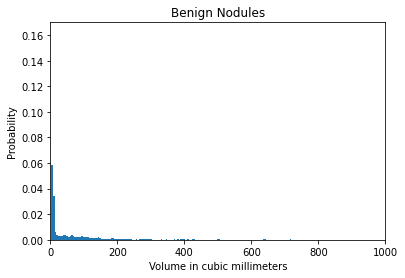

In [39]:
plt.hist(ben_diameter, density=True, bins=1500)  # density=False would make counts
plt.ylim([0, 0.17])
plt.xlim([0, 1000])
plt.title('Benign Nodules')
plt.ylabel('Probability')
plt.xlabel('Volume in cubic millimeters');
plt.savefig('./figs/histogram-benign-volume-prob.jpg')

# True positives and true negatives calculations

In [2]:
def get_binary_testing_data(radius, n1 = 1000, n2=2000, size = (64,64,28), levels=[1, 5]):
    h,w,d = size
    
    data = []
    label = []
    
    for level in levels:
        for i in tqdm(range(n1, n2)):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
            except :
                continue
            if level < 3:
                label.append(0)
            elif level > 3:
                label.append(1)
    return data, label

def test_data_prep(data, labels, BATCH_SIZE = 32):
    print('data length = ', len(labels))
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data, normalized, labels

def _get_path(radius, level, i):
    return './sameslicethickness/different_distances/radius_' + str(radius) + '/level_' + str(level) + '/volumes/v' + str(i) + '.npy'

class Normalizer:
    def __init__(self, data):
        self.min = np.min(data)
        self.max = np.max(data)
    
    def normalize(self, newdata):
        return (newdata - self.min)/(self.max - self.min)
    
def threshold(preds):
    preds[preds >= 0.5] = 1
    preds[preds < 0.5] = 0
    return preds

In [3]:
radii = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
test = []
for r in radii:
    t, l = get_binary_testing_data(radius = r, n1 = 0, n2 = 500, levels = [1, 5])
    test.append(test_data_prep(t, l))

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  980
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  976
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  972
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  952
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  920
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  914
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  914
max of training dataset:  1.0  & min:  0.0


In [4]:
m10 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r10')
m20 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r20')
m30 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r30')
m40 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r40')
m50 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r50')
models = [m10, m20, m30, m40, m50]

In [9]:
#results_accuracy = {'m10': [], 'm20': [], 'm30': [], 'm40': [], 'm50': []}
results_TP_rate = {'m10': [], 'm20': [], 'm30': [], 'm40': [], 'm50': []}
results_TN_rate = {'m10': [], 'm20': [], 'm30': [], 'm40': [], 'm50': []}
for test_data in tqdm(test):
    data_label_zipped, normalized, labels = test_data
    for m in range(1, len(models) + 1):
        model_no = str(m * 10)
        model_name = 'm' + model_no
        preds = models[m-1].predict(normalized)
        preds = threshold(preds)
        #r = models[m-1].evaluate(data_label_zipped)
        #results_accuracy[model_name].append(r[1])
        
        m = tf.keras.metrics.TruePositives()
        m.update_state(preds, labels)
        results_TP_rate[model_name].append(m.result().numpy()/len(labels))
        
        m = tf.keras.metrics.TrueNegatives()
        m.update_state(preds, labels)
        results_TN_rate[model_name].append(m.result().numpy()/len(labels))

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
def threshold(preds):
    preds[preds >= 0.5] = 1
    preds[preds < 0.5] = 0
    return preds

In [8]:
m = tf.keras.metrics.TrueNegatives()
data_label_zipped, normalized, labels = test[0]
preds = m10.predict(normalized)
preds = threshold(preds)
m.update_state(preds, labels)
m.result().numpy()/len(labels)

0.5

In [10]:
#pd.DataFrame(results_accuracy).to_csv('./sameslicethickness/different_distances/m10-to-m50-results-0500sample-accuracy.csv')
pd.DataFrame(results_TP_rate).to_csv('./sameslicethickness/different_distances/m10-to-m50-results-0500sample-tp.csv')
pd.DataFrame(results_TN_rate).to_csv('./sameslicethickness/different_distances/m10-to-m50-results-0500sample-tn.csv')

# Scatter plot prob vs diameter

In [4]:
def get_binary_testing_data(radius, n1 = 1000, n2=2000, size = (64,64,28), levels=[1, 5]):
    h,w,d = size
    
    loaded_vols = []
    data = []
    label = []
    
    for level in levels:
        for i in tqdm(range(n1, n2)):
            try:
                data.append(np.load(_get_path(radius, level, i)).reshape(h,w,d,1))
                loaded_vols.append(i)
            except :
                continue
            if level < 3:
                label.append(0)
            elif level > 3:
                label.append(1)
    return data, label, loaded_vols

def test_data_prep(data, labels, BATCH_SIZE = 32):
    print('data length = ', len(labels))
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data, normalized, labels

def _get_path(radius, level, i):
    return './sameslicethickness/different_distances/size_encoded/radius_' + str(radius) + '/level_' + str(level) + '/volumes/v' + str(i) + '.npy'

class Normalizer:
    def __init__(self, data):
        self.min = np.min(data)
        self.max = np.max(data)
    
    def normalize(self, newdata):
        return (newdata - self.min)/(self.max - self.min)
    
def threshold(preds):
    preds[preds >= 0.5] = 1
    preds[preds < 0.5] = 0
    return preds

In [27]:
#radii = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
radii = [10, 50]
test = []

t, l, ben_loaded_vols_r10 = get_binary_testing_data(radius = 10, n1 = 0, n2 = 500, levels = [1])
test.append(test_data_prep(t, l))

t, l, mal_loaded_vols_r10 = get_binary_testing_data(radius = 10, n1 = 0, n2 = 500, levels = [5])
test.append(test_data_prep(t, l))

t, l, ben_loaded_vols_r50 = get_binary_testing_data(radius = 50, n1 = 0, n2 = 500, levels = [1])
test.append(test_data_prep(t, l))

t, l, mal_loaded_vols_r50 = get_binary_testing_data(radius = 50, n1 = 0, n2 = 500, levels = [5])
test.append(test_data_prep(t, l))


del t, l

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  500
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

data length =  500
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

data length =  454
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

data length =  460
max of training dataset:  1.0  & min:  0.0


In [35]:
document = pd.read_csv(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\sameslicethickness\different_distances\size_encoded/Volume-DistanceToNodule.csv')

In [48]:
def get_diameter(document, radius, score, vname):
    import math
    df = document['N-diameter'].where((document['radius'] == radius) 
                             & (document['malginancy score'] == score)
                             & (document['volume'] == vname))
    for i in df:
        if math.isnan(i):
            continue
        else :
            return i  

In [49]:
get_diameter(document, 10, 1, 'v10')

5.515928014760495

In [50]:
# load diameter
ben_test_diameters_r10 = []
for i in tqdm(ben_loaded_vols_r10, total=len(ben_loaded_vols_r10)):
    ben_test_diameters_r10.append(get_diameter(document, 10, 1, 'v' + str(i)))
        
mal_test_diameters_r10 = []
for i in tqdm(mal_loaded_vols_r10, total=len(mal_loaded_vols_r10)):
    mal_test_diameters_r10.append(get_diameter(document, 10, 5, 'v' + str(i)))
    

ben_test_diameters_r50 = []
for i in tqdm(ben_loaded_vols_r50, total=len(ben_loaded_vols_r50)):
    ben_test_diameters_r50.append(get_diameter(document, 10, 1, 'v' + str(i)))
        
mal_test_diameters_r50 = []
for i in tqdm(mal_loaded_vols_r50, total=len(mal_loaded_vols_r50)):
    mal_test_diameters_r50.append(get_diameter(document, 10, 5, 'v' + str(i)))

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

In [51]:
m10 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r10')
m50 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r50')

In [52]:
data_label_zipped, normalized, labels = test[0]
preds_ben_10 = m10.predict(normalized)

data_label_zipped, normalized, labels = test[1]
preds_mal_10 = m10.predict(normalized)

data_label_zipped, normalized, labels = test[2]
preds_ben_50 = m10.predict(normalized)

data_label_zipped, normalized, labels = test[3]
preds_mal_50 = m10.predict(normalized)

In [59]:
print(len(preds_ben_10) == len(ben_test_diameters_r10))
print(len(preds_mal_10) == len(mal_test_diameters_r10))
print(len(preds_ben_50) == len(ben_test_diameters_r50))
print(len(preds_mal_50) == len(mal_test_diameters_r50))

True
True
True
True


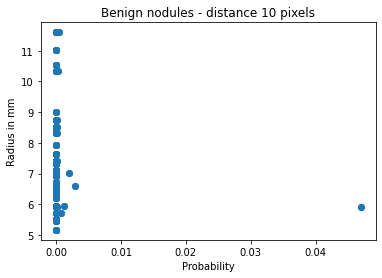

In [62]:
plt.scatter(preds_ben_10, ben_test_diameters_r10)
plt.title('Benign nodules - distance 10 pixels')
plt.xlabel('Probability')
plt.ylabel('Radius in mm')
plt.savefig('./figs/benignNodules-distance10pixels.jpg')

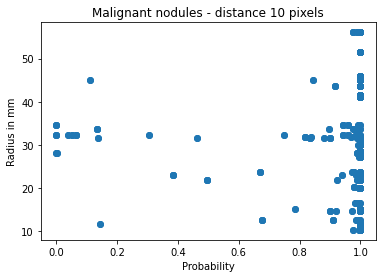

In [65]:
plt.scatter(preds_mal_10, mal_test_diameters_r10)
plt.title('Malignant nodules - distance 10 pixels')
plt.xlabel('Probability')
plt.ylabel('Radius in mm')
plt.savefig('./figs/malignantNodules-distance10pixels.jpg')

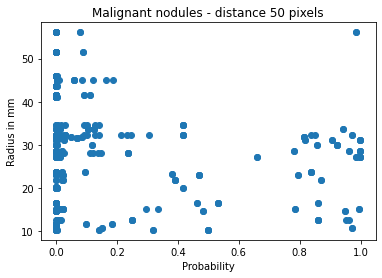

In [66]:
plt.scatter(preds_mal_50, mal_test_diameters_r50)
plt.title('Malignant nodules - distance 50 pixels')
plt.xlabel('Probability')
plt.ylabel('Radius in mm')
plt.savefig('./figs/malignantNodules-distance50pixels.jpg')

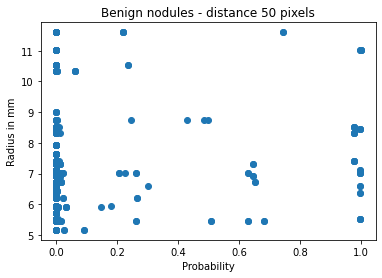

In [67]:
plt.scatter(preds_ben_50, ben_test_diameters_r50)
plt.title('Benign nodules - distance 50 pixels')
plt.xlabel('Probability')
plt.ylabel('Radius in mm')
plt.savefig('./figs/benignNodules-distance50pixels.jpg')

# Accuracy of m10 to m50 lines

In [ ]:
def test_data_prep(data, labels, BATCH_SIZE = 32):
    print('data length = ', len(labels))
    scaler = Normalizer(data)
    normalized = scaler.normalize(data)
    print("max of training dataset: ", np.max(normalized), " & min: ", np.min(normalized))
    data = tf.data.Dataset.from_tensor_slices((normalized, labels))
    test_data = data.batch(BATCH_SIZE)
    return test_data

In [71]:
results_accuracy = pd.read_excel(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\sameslicethickness\different_distances\m10-to-m50-results-0500sample.xlsx', index_col=0)

In [73]:
m10_data = list(results_accuracy['m10'])
m20_data = list(results_accuracy['m20'])
m30_data = list(results_accuracy['m30'])
m40_data = list(results_accuracy['m40'])
m50_data = list(results_accuracy['m50'])

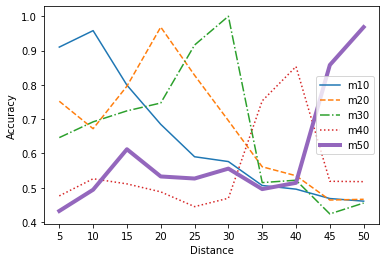

In [98]:
plt.plot(m10_data, ls='-')
plt.plot(m20_data, ls='--')
plt.plot(m30_data, ls='-.')
plt.plot(m40_data, ls=':')
plt.plot(m50_data, ls='-', linewidth = '4')
plt.legend(['m10', 'm20', 'm30', 'm40', 'm50'])
plt.xlabel('Distance')
plt.ylabel('Accuracy')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50'])
plt.savefig('./figs/accuracyVSdistance.jpg', dpi=300)
plt.show()

# ROC curves

In [2]:
m10 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r10')
m20 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r20')
m30 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r30')
m40 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r40')
m50 = tf.keras.models.load_model(r'A:\After Graduation\CUFE Masters\Thesis\Pulmonary Nodules\data\code\models\model_r50')
models = [m10, m20, m30, m40, m50]

In [5]:
radii = [10, 20, 30, 40, 50]
test = []

t, l, _ = get_binary_testing_data(radius = 10, n1 = 0, n2 = 500, levels = [1, 5])
test.append(test_data_prep(t, l))

t, l, _ = get_binary_testing_data(radius = 20, n1 = 0, n2 = 500, levels = [1, 5])
test.append(test_data_prep(t, l))

t, l, _ = get_binary_testing_data(radius = 30, n1 = 0, n2 = 500, levels = [1, 5])
test.append(test_data_prep(t, l))

t, l, _ = get_binary_testing_data(radius = 40, n1 = 0, n2 = 500, levels = [1, 5])
test.append(test_data_prep(t, l))

t, l, _ = get_binary_testing_data(radius = 50, n1 = 0, n2 = 500, levels = [1, 5])
test.append(test_data_prep(t, l))


del t, l

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  1000
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  980
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  972
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  920
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

data length =  914
max of training dataset:  1.0  & min:  0.0


  0%|          | 0/5 [00:00<?, ?it/s]

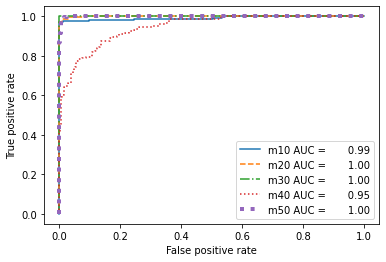

In [8]:
for m, t, i, ls in tqdm(zip(models, test, ['m10', 'm20', 'm30', 'm40', 'm50'], ['-', '--', '-.', ':', ':']), total = len(models)):
    data_label_zipped, normalized, labels = t
    preds = m.predict(normalized)
    fpr, tpr, th = roc_curve(labels, preds)
    auc = roc_auc_score(labels, preds)
    if i == 'm50':
        plt.plot(fpr,tpr, label=i + ' AUC = {0:10.2f}'.format(auc), ls=ls, linewidth = '4')
    else:
        plt.plot(fpr,tpr, label=i + ' AUC = {0:10.2f}'.format(auc), ls =ls)
        
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.savefig('./figs/_trialROC.jpg', dpi=300)
plt.show()

# Idea Illustration

Loading dicom files ... This may take a moment.


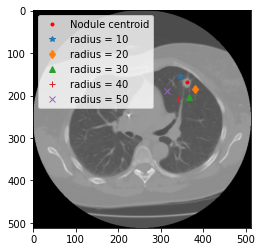

In [49]:
ann = pl.query(pl.Annotation).first()
i,j,k = ann.centroid

vol = ann.scan.to_volume()
plt.imshow(vol[:,:,int(k)], cmap=plt.cm.gray)
plt.plot(j, i, '.r', label="Nodule centroid")
plt.plot(j-15, i-15, '*', label="radius = 10")
plt.plot(j+20, i+15, 'd', label="radius = 20")
plt.plot(j+5, i+35, '^', label="radius = 30")
plt.plot(j-20, i+40, '+', label="radius = 40")
plt.plot(j-45, i+20, 'x', label="radius = 50")

plt.legend()
plt.savefig('./figs/_trialIlust.jpg', dpi=500)
plt.show()